In [2]:
# Coursework 2 and 3 (final version 3.0)
# Tony, YIT19488399
# Data Science with Kimia Aksir
# Year 2, term 2 (2021/2022)
# Date submission coursework : Tuesday, 26 of April 2022
#######################################################
# Disease is the label
# Symptom_N are the variables

# Naive Bayes similar to Lab 8, Data Science with Kimia Aksir.

In [3]:
# data preprocessing, CSV file.
import pandas as pd
# Read the csv file
df = pd.read_csv('/content/dataset.csv')
print(df.to_string()) 

Output hidden; open in https://colab.research.google.com to view.

In [4]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# First 10 rows
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [7]:
#dataset charctersitics
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [8]:
#dataset charctersitics
df.describe().T

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal_pain,264
Symptom_8,1944,21,abdominal_pain,276
Symptom_9,1692,22,yellowing_of_eyes,228


In [9]:
X=df.iloc[:, 1:18].values
print(X)

[['itching' ' skin_rash' ' nodal_skin_eruptions' ... nan nan nan]
 [' skin_rash' ' nodal_skin_eruptions' ' dischromic _patches' ... nan nan
  nan]
 ['itching' ' nodal_skin_eruptions' ' dischromic _patches' ... nan nan
  nan]
 ...
 [' burning_micturition' ' bladder_discomfort' ' foul_smell_of urine' ...
  nan nan nan]
 [' skin_rash' ' joint_pain' ' skin_peeling' ... nan nan nan]
 [' skin_rash' ' high_fever' ' blister' ... nan nan nan]]


In [10]:
y=df.iloc[:,0:1].values
y

array([['Fungal infection'],
       ['Fungal infection'],
       ['Fungal infection'],
       ...,
       ['Urinary tract infection'],
       ['Psoriasis'],
       ['Impetigo']], dtype=object)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import CategoricalNB

In [12]:
le = LabelEncoder()
y_converted = le.fit_transform(y)
print(y)
print(len(y))
print("####################")
print(y_converted)
print(len(y_converted))

[['Fungal infection']
 ['Fungal infection']
 ['Fungal infection']
 ...
 ['Urinary tract infection']
 ['Psoriasis']
 ['Impetigo']]
4920
####################
[15 15 15 ... 38 35 27]
4920


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
x_Symptom_1= X[:,0:1]
x_Symptom_1=x_Symptom_1.reshape(4920)
print(x_Symptom_1.shape)
print(x_Symptom_1)
x_Symptom_1=le.fit_transform(x_Symptom_1)
print(x_Symptom_1)

(4920,)
['itching' ' skin_rash' 'itching' ... ' burning_micturition' ' skin_rash'
 ' skin_rash']
[33 24 33 ...  4 24 24]


In [14]:
x_Symptom_2= X[:,1:2]
x_Symptom_2=x_Symptom_2.reshape(4920)
print(x_Symptom_2.shape)
print(x_Symptom_2)
x_Symptom_2=le.fit_transform(x_Symptom_2)
print(x_Symptom_2)

(4920,)
[' skin_rash' ' nodal_skin_eruptions' ' nodal_skin_eruptions' ...
 ' bladder_discomfort' ' joint_pain' ' high_fever']
[35 27 27 ...  4 20 18]


In [15]:
x_Symptom_3= X[:,2:3]
x_Symptom_3=x_Symptom_3.reshape(4920)
print(x_Symptom_3.shape)
print(x_Symptom_3)
x_Symptom_3=le.fit_transform(x_Symptom_3)
print(x_Symptom_3)

(4920,)
[' nodal_skin_eruptions' ' dischromic _patches' ' dischromic _patches' ...
 ' foul_smell_of urine' ' skin_peeling' ' blister']
[35 18 18 ... 22 42  4]


In [16]:
X_converted=np.array([x_Symptom_1,x_Symptom_2,x_Symptom_3])
X_converted=X_converted.reshape(4920,3)
print(X_converted.shape)
print(X_converted)

(4920, 3)
[[33 24 33]
 [33 33 24]
 [33 33 33]
 ...
 [52  2 27]
 [46 33  3]
 [22 42  4]]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_converted, y_converted, test_size = 0.68, random_state=36)
print(X_train)
print('***********************')
print(X_test)

[[ 7  7 28]
 [47 47 47]
 [28 11 12]
 ...
 [11 11 28]
 [15 15 28]
 [ 3 22 42]]
***********************
[[12 12  0]
 [17 17 24]
 [51 21 24]
 ...
 [28  6  6]
 [21 21 14]
 [24 21 21]]


In [18]:
clf = CategoricalNB()
clf.fit(X_train, y_train)

CategoricalNB()

In [19]:
print(X_train)
print(y_train)
print(len(X_train))
print(len(y_train))
y_pred=clf.predict(X_test)
print(y_pred)

[[ 7  7 28]
 [47 47 47]
 [28 11 12]
 ...
 [11 11 28]
 [15 15 28]
 [ 3 22 42]]
[ 6 20 35 ... 23 19 10]
1574
1574
[23  7 37 ...  6 21 17]


In [20]:
ac = accuracy_score(y_test,y_pred)
print(ac)

0.41123729826658695


In [21]:
new_row=np.array(['itching',' vomiting','  yellowish_skin'])

new_row_converted=le.fit_transform(new_row)
new_row_converted=new_row_converted.reshape(1,3)
print(new_row_converted.shape)
y_pred=clf.predict(new_row_converted)
print(y_pred)
print(y.take(y_pred))

(1, 3)
[30]
['Chronic cholestasis']


# Naive Bayes, different approach


In [22]:
import pandas
dd = pandas.read_csv("/content/dataset.csv")
dd.nunique()

Disease       41
Symptom_1     34
Symptom_2     48
Symptom_3     54
Symptom_4     50
Symptom_5     38
Symptom_6     32
Symptom_7     26
Symptom_8     21
Symptom_9     22
Symptom_10    21
Symptom_11    18
Symptom_12    11
Symptom_13     8
Symptom_14     4
Symptom_15     3
Symptom_16     3
Symptom_17     1
dtype: int64

In [23]:
print(dd.Disease.unique())
print(len(dd.Disease.unique()))

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
41


In [24]:
print(dd.Symptom_1.unique())
print(len(dd.Symptom_1.unique()))

['itching' ' skin_rash' ' continuous_sneezing' ' shivering'
 ' stomach_pain' ' acidity' ' vomiting' ' indigestion' ' muscle_wasting'
 ' patches_in_throat' ' fatigue' ' weight_loss' ' sunken_eyes' ' cough'
 ' headache' ' chest_pain' ' back_pain' ' weakness_in_limbs' ' chills'
 ' joint_pain' ' yellowish_skin' ' constipation'
 ' pain_during_bowel_movements' ' breathlessness' ' cramps' ' weight_gain'
 ' mood_swings' ' neck_pain' ' muscle_weakness' ' stiff_neck'
 ' pus_filled_pimples' ' burning_micturition' ' bladder_discomfort'
 ' high_fever']
34


In [25]:
print(dd.Symptom_2.unique())
print(len(dd.Symptom_2.unique()))

[' skin_rash' ' nodal_skin_eruptions' ' shivering' ' chills' ' acidity'
 ' ulcers_on_tongue' ' vomiting' ' yellowish_skin' ' stomach_pain'
 ' loss_of_appetite' ' indigestion' ' patches_in_throat' ' high_fever'
 ' weight_loss' ' restlessness' ' sunken_eyes' ' dehydration' ' cough'
 ' chest_pain' ' dizziness' ' headache' ' weakness_in_limbs' ' neck_pain'
 ' weakness_of_one_body_side' ' fatigue' ' joint_pain' ' lethargy'
 ' nausea' ' abdominal_pain' ' pain_during_bowel_movements'
 ' pain_in_anal_region' ' breathlessness' ' sweating' ' cramps'
 ' bruising' ' weight_gain' ' cold_hands_and_feets' ' mood_swings'
 ' anxiety' ' knee_pain' ' stiff_neck' ' swelling_joints'
 ' pus_filled_pimples' ' blackheads' ' bladder_discomfort'
 ' foul_smell_of urine' ' skin_peeling' ' blister']
48


In [26]:
print(dd.Symptom_3.unique())
print(len(dd.Symptom_3.unique()))

[' nodal_skin_eruptions' ' dischromic _patches' ' chills'
 ' watering_from_eyes' ' ulcers_on_tongue' ' vomiting' ' yellowish_skin'
 ' nausea' ' stomach_pain' ' burning_micturition' ' abdominal_pain'
 ' loss_of_appetite' ' high_fever' ' extra_marital_contacts'
 ' restlessness' ' lethargy' ' dehydration' ' diarrhoea' ' breathlessness'
 ' dizziness' ' loss_of_balance' ' headache'
 ' blurred_and_distorted_vision' ' neck_pain' ' weakness_of_one_body_side'
 ' altered_sensorium' ' fatigue' ' weight_loss' ' sweating' ' joint_pain'
 ' dark_urine' ' swelling_of_stomach' ' cough' ' pain_in_anal_region'
 ' bloody_stool' ' chest_pain' ' bruising' ' obesity'
 ' cold_hands_and_feets' ' mood_swings' ' anxiety' ' knee_pain'
 ' hip_joint_pain' ' swelling_joints' ' movement_stiffness'
 ' spinning_movements' ' blackheads' ' scurring' ' foul_smell_of urine'
 ' continuous_feel_of_urine' ' skin_peeling' ' silver_like_dusting'
 ' blister' ' red_sore_around_nose']
54


In [27]:
print(dd.Symptom_16.unique())
print(len(dd.Symptom_16.unique()))

[nan ' blood_in_sputum' ' loss_of_smell' ' muscle_pain']
4


In [28]:
print(dd.Symptom_17.unique())
print(len(dd.Symptom_17.unique()))

[nan ' muscle_pain']
2


In [29]:
# Using pandas.unique() to unique values in multiple columns
df2 = pd.unique(dd[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
                    'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 
                    'Symptom_17']].values.ravel())
print(df2)
print(len(df2), "different symptoms in TOTAL.")
print(" nan" in df2)
print(' fatigue' in df2)

['itching' ' skin_rash' ' nodal_skin_eruptions' ' dischromic _patches' nan
 ' continuous_sneezing' ' shivering' ' chills' ' watering_from_eyes'
 ' stomach_pain' ' acidity' ' ulcers_on_tongue' ' vomiting' ' cough'
 ' chest_pain' ' yellowish_skin' ' nausea' ' loss_of_appetite'
 ' abdominal_pain' ' yellowing_of_eyes' ' burning_micturition'
 ' spotting_ urination' ' passage_of_gases' ' internal_itching'
 ' indigestion' ' muscle_wasting' ' patches_in_throat' ' high_fever'
 ' extra_marital_contacts' ' fatigue' ' weight_loss' ' restlessness'
 ' lethargy' ' irregular_sugar_level' ' blurred_and_distorted_vision'
 ' obesity' ' excessive_hunger' ' increased_appetite' ' polyuria'
 ' sunken_eyes' ' dehydration' ' diarrhoea' ' breathlessness'
 ' family_history' ' mucoid_sputum' ' headache' ' dizziness'
 ' loss_of_balance' ' lack_of_concentration' ' stiff_neck' ' depression'
 ' irritability' ' visual_disturbances' ' back_pain' ' weakness_in_limbs'
 ' neck_pain' ' weakness_of_one_body_side' ' altered_

In [30]:
# Using pandas.unique() to unique values in multiple columns
df3 = pd.unique(dd[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
                    'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 
                    'Symptom_17', 'Disease']].values.ravel())
print(df3)
print(len(df3), "different symptoms + diagnostics in TOTAL.")
print(" nan" in df3)
print(' fatigue' in df3)

['itching' ' skin_rash' ' nodal_skin_eruptions' ' dischromic _patches' nan
 'Fungal infection' ' continuous_sneezing' ' shivering' ' chills'
 ' watering_from_eyes' 'Allergy' ' stomach_pain' ' acidity'
 ' ulcers_on_tongue' ' vomiting' ' cough' ' chest_pain' 'GERD'
 ' yellowish_skin' ' nausea' ' loss_of_appetite' ' abdominal_pain'
 ' yellowing_of_eyes' 'Chronic cholestasis' ' burning_micturition'
 ' spotting_ urination' 'Drug Reaction' ' passage_of_gases'
 ' internal_itching' 'Peptic ulcer diseae' ' indigestion'
 ' muscle_wasting' ' patches_in_throat' ' high_fever'
 ' extra_marital_contacts' 'AIDS' ' fatigue' ' weight_loss'
 ' restlessness' ' lethargy' ' irregular_sugar_level'
 ' blurred_and_distorted_vision' ' obesity' ' excessive_hunger'
 ' increased_appetite' ' polyuria' 'Diabetes ' ' sunken_eyes'
 ' dehydration' ' diarrhoea' 'Gastroenteritis' ' breathlessness'
 ' family_history' ' mucoid_sputum' 'Bronchial Asthma' ' headache'
 ' dizziness' ' loss_of_balance' ' lack_of_concentration' 

In [31]:
# Using pandas.unique() to unique values in multiple columns
df4 = pd.unique(dd[['Disease']].values.ravel())
print(df4)
print(len(df4), "different diagnostics.")
print(" nan" in df4)
print(' fatigue' in df4)

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
41 different diagnostics.
False
False


https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df2)
LabelEncoder()
le.classes_
#array([1, 2, 6])
le.transform(df2)
#array([0, 0, 1, 2])
#list(le.inverse_transform([2, 2, 1]))
#array([1, 1, 2, 6])

array([130,  99,  72,  32, 131,  25,  95,  19, 121, 106,   2, 117, 120,
        26,  18, 129,  70,  59,   0, 128,  17, 103,  79,  51,  49,  68,
        80,  45,  38,  41, 125,  91,  58,  52,  13,  73,  37,  48,  82,
       107,  29,  31,  14,  39,  66,  44,  34,  60,  57, 104,  30,  53,
       119,   6, 122,  71, 123,   4,  28, 108,  67,  63, 109,  62,  89,
        55,  74,  23, 116,   7, 127,  86,  87,  21, 105,   3, 111,  33,
        47,  42,  81,  11, 115,  90,  97,  92,  22,  61,  40,  93,  75,
        76,  12,  54,  27,  16, 114, 112,  83, 124,  20,  64,  84,  36,
        15, 113,   1,  69,   5, 100,  78,  35,  56,  46, 110,  77,  65,
       102, 118,  85,   8,  94,   9,  43,  24,  98,  96, 101,  50,  10,
        88, 126])

In [33]:
list(le.inverse_transform([2, 1, 0, 74, 123]))

[' acidity',
 ' abnormal_menstruation',
 ' abdominal_pain',
 ' pain_behind_the_eyes',
 ' weakness_of_one_body_side']

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df4)
LabelEncoder()
le.classes_
le.transform(df4)
list(le.inverse_transform([40]))

['hepatitis A']

In [35]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
nbdf = pd.read_csv("/content/dataset.csv")

In [37]:
number = LabelEncoder()
nbdf['Disease'] = number.fit_transform(nbdf['Disease'])
nbdf['Symptom_1'] = number.fit_transform(nbdf['Symptom_1'])
nbdf['Symptom_2'] = number.fit_transform(nbdf['Symptom_2'])
nbdf['Symptom_3'] = number.fit_transform(nbdf['Symptom_3'])
nbdf['Symptom_4'] = number.fit_transform(nbdf['Symptom_4'])
nbdf['Symptom_5'] = number.fit_transform(nbdf['Symptom_5'])
nbdf['Symptom_6'] = number.fit_transform(nbdf['Symptom_6'])
nbdf['Symptom_7'] = number.fit_transform(nbdf['Symptom_7'])
nbdf['Symptom_8'] = number.fit_transform(nbdf['Symptom_8'])
nbdf['Symptom_9'] = number.fit_transform(nbdf['Symptom_9'])
nbdf['Symptom_10'] = number.fit_transform(nbdf['Symptom_10'])
nbdf['Symptom_11'] = number.fit_transform(nbdf['Symptom_11'])
nbdf['Symptom_12'] = number.fit_transform(nbdf['Symptom_12'])
nbdf['Symptom_13'] = number.fit_transform(nbdf['Symptom_13'])
nbdf['Symptom_14'] = number.fit_transform(nbdf['Symptom_14'])
nbdf['Symptom_15'] = number.fit_transform(nbdf['Symptom_15'])
nbdf['Symptom_16'] = number.fit_transform(nbdf['Symptom_16'])
nbdf['Symptom_17'] = number.fit_transform(nbdf['Symptom_17'])

In [38]:
features = ["Symptom_1", "Symptom_2", "Symptom_3", "Symptom_4", "Symptom_5", "Symptom_6", "Symptom_7", "Symptom_8", "Symptom_9",
            "Symptom_10", "Symptom_11", "Symptom_12", "Symptom_13", "Symptom_14", "Symptom_15", "Symptom_16", "Symptom_17"]
target = "Disease"

In [39]:
features_train, features_test, target_train, target_test = train_test_split(nbdf[features],
nbdf[target],test_size = 0.70,random_state = 54)

In [40]:
model = GaussianNB()
model.fit(features_train, target_train)

GaussianNB()

In [41]:
pred = model.predict(features_test)
accuracy = accuracy_score(target_test, pred)
print(accuracy)

0.8768873403019745


In [42]:
#Examples of symptoms input by user and first column is the disease number that can be translated to text...
features_test

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
1613,4,16,13,50,38,32,26,21,22,21,18,11,8,4,3,3,1
2713,11,46,39,24,17,1,18,6,6,11,18,11,8,4,3,3,1
2408,18,36,46,28,25,32,26,21,22,21,18,11,8,4,3,3,1
342,19,21,25,41,25,32,26,21,22,21,18,11,8,4,3,3,1
1118,28,39,10,50,38,32,26,21,22,21,18,11,8,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,11,24,52,34,30,7,9,6,11,6,0,11,8,4,3,3,1
2668,33,42,53,29,21,0,25,21,22,21,18,11,8,4,3,3,1
845,26,1,48,44,4,32,26,21,22,21,18,11,8,4,3,3,1
660,6,42,21,46,4,13,2,16,8,8,17,10,2,2,1,0,1


In [43]:
print("Watch the symptoms number and input in next block to predict the Disease:")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df2)
LabelEncoder()
le.classes_
#array([1, 2, 6])
le.transform(df2)
#array([0, 0, 1, 2])
#list(le.inverse_transform([2, 2, 1]))
#array([1, 1, 2, 6])
print(len(le.transform(df2)), "is the maximum number for symptom, starting from 0")


Watch the symptoms number and input in next block to predict the Disease:
132 is the maximum number for symptom, starting from 0


In [44]:
for i in range (132):
    print(list(le.inverse_transform([i])), "--> ",  i)

[' abdominal_pain'] -->  0
[' abnormal_menstruation'] -->  1
[' acidity'] -->  2
[' acute_liver_failure'] -->  3
[' altered_sensorium'] -->  4
[' anxiety'] -->  5
[' back_pain'] -->  6
[' belly_pain'] -->  7
[' blackheads'] -->  8
[' bladder_discomfort'] -->  9
[' blister'] -->  10
[' blood_in_sputum'] -->  11
[' bloody_stool'] -->  12
[' blurred_and_distorted_vision'] -->  13
[' breathlessness'] -->  14
[' brittle_nails'] -->  15
[' bruising'] -->  16
[' burning_micturition'] -->  17
[' chest_pain'] -->  18
[' chills'] -->  19
[' cold_hands_and_feets'] -->  20
[' coma'] -->  21
[' congestion'] -->  22
[' constipation'] -->  23
[' continuous_feel_of_urine'] -->  24
[' continuous_sneezing'] -->  25
[' cough'] -->  26
[' cramps'] -->  27
[' dark_urine'] -->  28
[' dehydration'] -->  29
[' depression'] -->  30
[' diarrhoea'] -->  31
[' dischromic _patches'] -->  32
[' distention_of_abdomen'] -->  33
[' dizziness'] -->  34
[' drying_and_tingling_lips'] -->  35
[' enlarged_thyroid'] -->  36

In [45]:
print(model.predict([[10,20,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
print(model.predict([[4,	16,	13,	50,	38,	32,	26,	21,	22,	21,	18,	11,	8,	4,	3,	3,	1]]))
print(model.predict([[6,	42,	21,	46,	4,	13,	2,	16,	8,	8,	17,	10,	2,	2,	1,	0,	1,]]))

[10]
[4]
[36]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df4)
LabelEncoder()
le.classes_
le.transform(df4)
list(le.inverse_transform([40]))
len(le.transform(df4))

41

In [47]:
for i in range (41):
    print(le.inverse_transform([i]), "--> ",  i)

['(vertigo) Paroymsal  Positional Vertigo'] -->  0
['AIDS'] -->  1
['Acne'] -->  2
['Alcoholic hepatitis'] -->  3
['Allergy'] -->  4
['Arthritis'] -->  5
['Bronchial Asthma'] -->  6
['Cervical spondylosis'] -->  7
['Chicken pox'] -->  8
['Chronic cholestasis'] -->  9
['Common Cold'] -->  10
['Dengue'] -->  11
['Diabetes '] -->  12
['Dimorphic hemmorhoids(piles)'] -->  13
['Drug Reaction'] -->  14
['Fungal infection'] -->  15
['GERD'] -->  16
['Gastroenteritis'] -->  17
['Heart attack'] -->  18
['Hepatitis B'] -->  19
['Hepatitis C'] -->  20
['Hepatitis D'] -->  21
['Hepatitis E'] -->  22
['Hypertension '] -->  23
['Hyperthyroidism'] -->  24
['Hypoglycemia'] -->  25
['Hypothyroidism'] -->  26
['Impetigo'] -->  27
['Jaundice'] -->  28
['Malaria'] -->  29
['Migraine'] -->  30
['Osteoarthristis'] -->  31
['Paralysis (brain hemorrhage)'] -->  32
['Peptic ulcer diseae'] -->  33
['Pneumonia'] -->  34
['Psoriasis'] -->  35
['Tuberculosis'] -->  36
['Typhoid'] -->  37
['Urinary tract infection'

In [48]:
#Translation of the predicted disease in number to text.
list(le.inverse_transform([10]))

['Common Cold']

In [49]:
list(le.inverse_transform([36]))

['Tuberculosis']

In [50]:
list(le.inverse_transform([4]))

['Allergy']

# Naive Bayes, approach from Kaggle...


In [51]:
dict(dd['Symptom_1'].value_counts())

{' acidity': 120,
 ' back_pain': 108,
 ' bladder_discomfort': 12,
 ' breathlessness': 12,
 ' burning_micturition': 108,
 ' chest_pain': 12,
 ' chills': 474,
 ' constipation': 114,
 ' continuous_sneezing': 222,
 ' cough': 12,
 ' cramps': 6,
 ' fatigue': 690,
 ' headache': 126,
 ' high_fever': 6,
 ' indigestion': 12,
 ' joint_pain': 462,
 ' mood_swings': 6,
 ' muscle_wasting': 108,
 ' muscle_weakness': 114,
 ' neck_pain': 6,
 ' pain_during_bowel_movements': 6,
 ' patches_in_throat': 12,
 ' pus_filled_pimples': 6,
 ' shivering': 12,
 ' skin_rash': 480,
 ' stiff_neck': 6,
 ' stomach_pain': 114,
 ' sunken_eyes': 12,
 ' vomiting': 822,
 ' weakness_in_limbs': 12,
 ' weight_gain': 12,
 ' weight_loss': 6,
 ' yellowish_skin': 12,
 'itching': 678}

In [52]:
dd['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [53]:
dd['Symptom_12'].value_counts()

 malaise                           126
 receiving_unsterile_injections     72
 coma                               72
 swelled_lymph_nodes                72
 sinus_pressure                     72
 irritability                       72
 palpitations                       72
 stomach_bleeding                   48
 runny_nose                         48
 abnormal_menstruation              48
 muscle_pain                        42
Name: Symptom_12, dtype: int64

In [54]:
df['Symptom_14'].unique()

array([nan, ' red_spots_over_body', ' phlegm', ' chest_pain',
       ' congestion'], dtype=object)

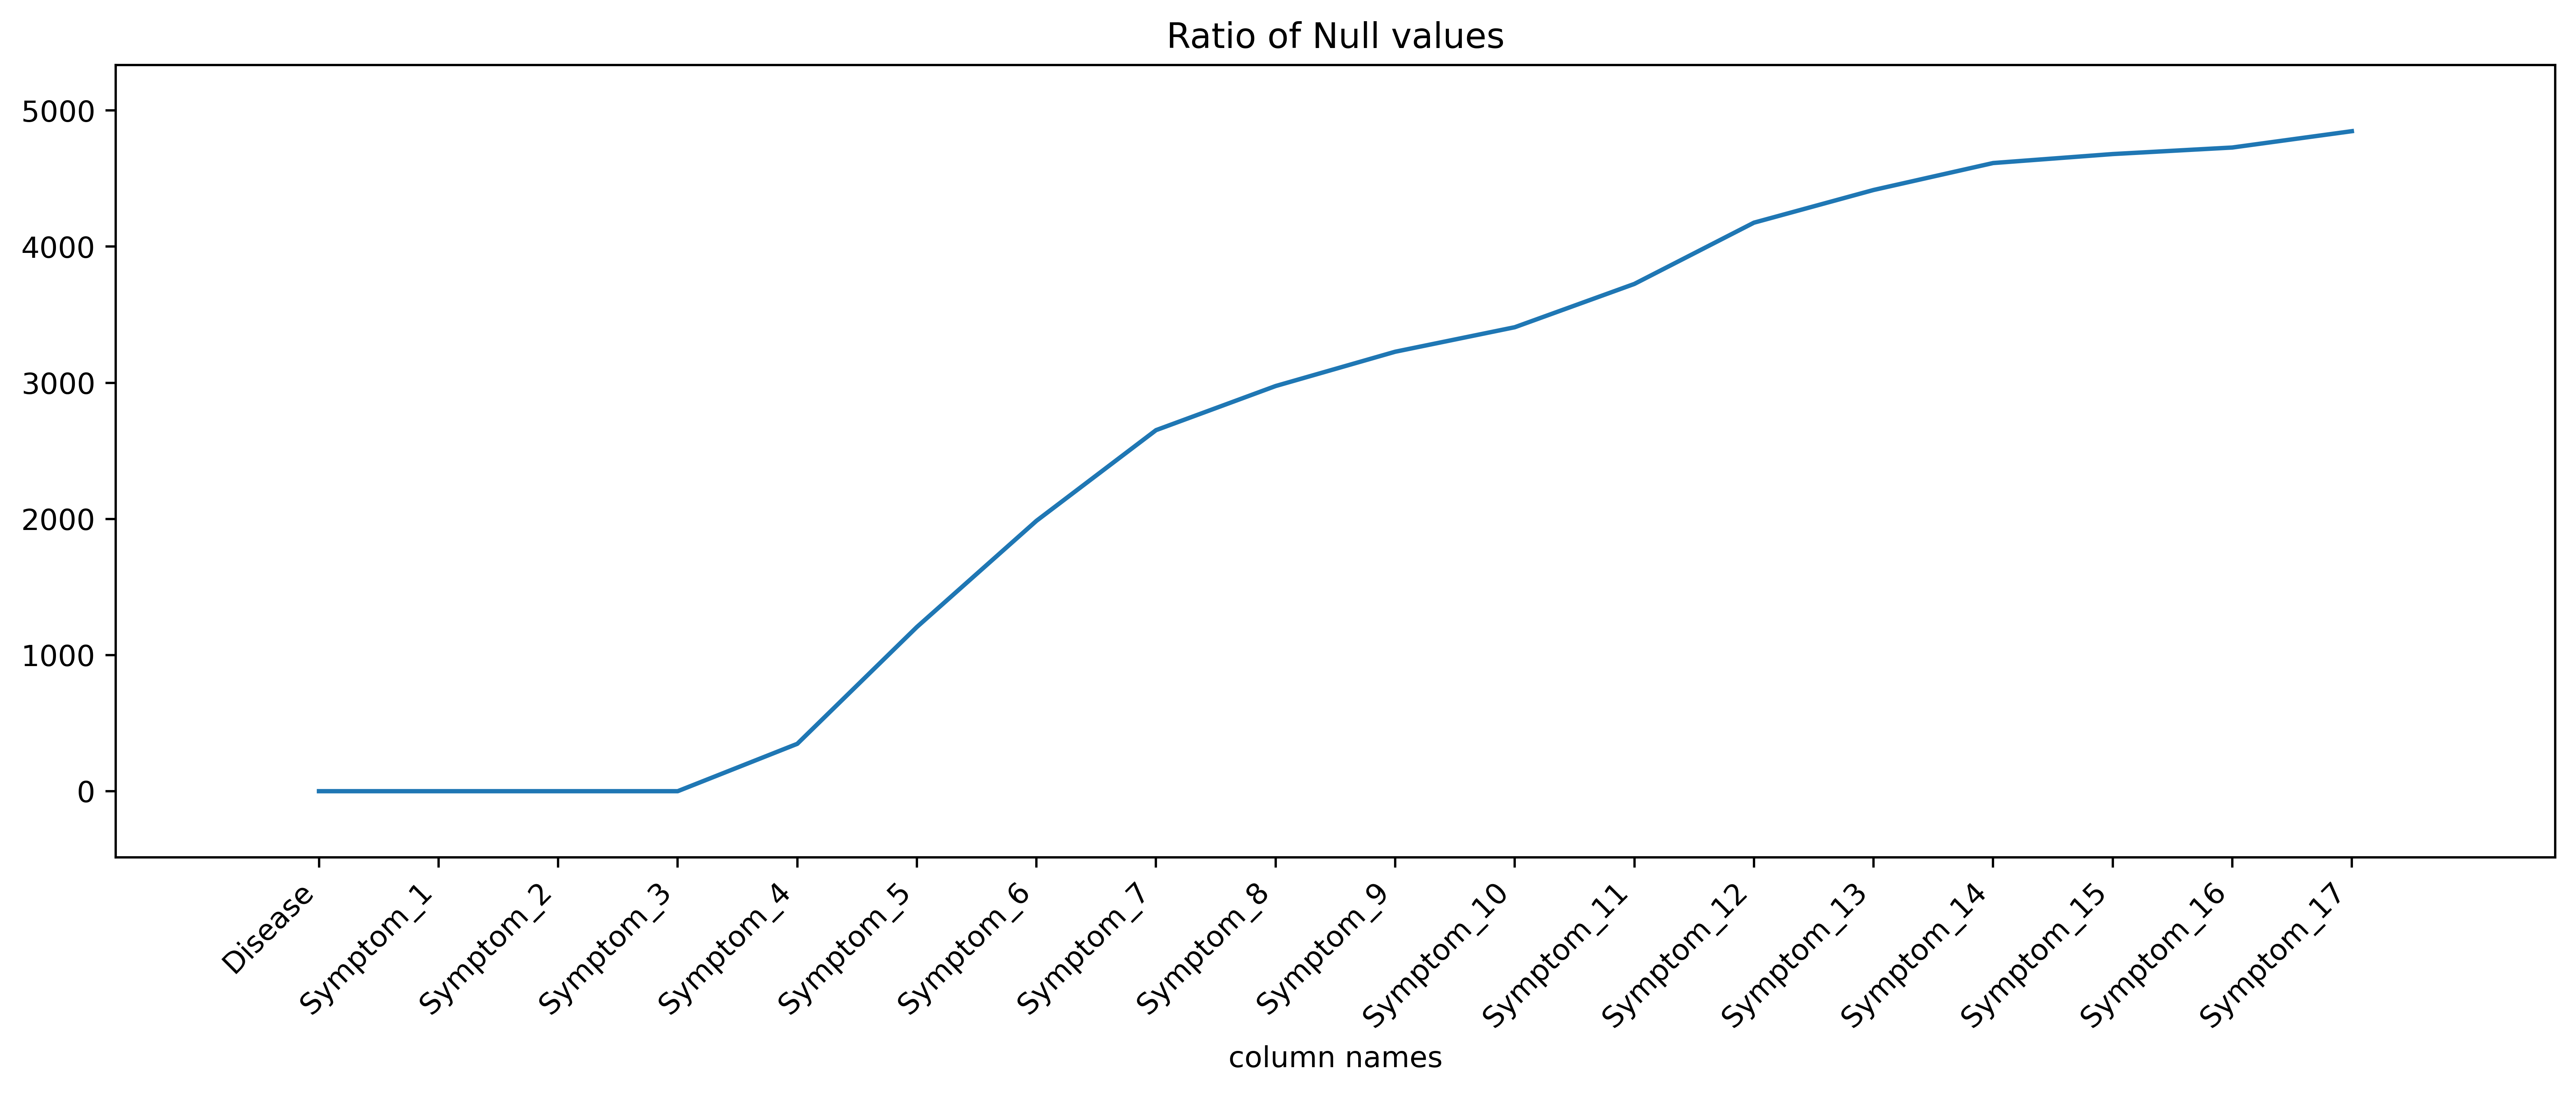

In [55]:
## plot of null value
## check null values
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
plt.figure(figsize=(15, 5), dpi=555)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<bound method NDFrame.tail of                                       Disease             Symptom_1  \
0                            Fungal infection               itching   
1                            Fungal infection             skin_rash   
2                            Fungal infection               itching   
3                            Fungal infection               itching   
4                            Fungal infection               itching   
...                                       ...                   ...   
4915  (vertigo) Paroymsal  Positional Vertigo              vomiting   
4916                                     Acne             skin_rash   
4917                  Urinary tract infection   burning_micturition   
4918                                Psoriasis             skin_rash   
4919                                 Impetigo             skin_rash   

                  Symptom_2              Symptom_3                  Symptom_4  \
0                 skin_rash   nodal_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


   itching   skin_rash   nodal_skin_eruptions   dischromic _patches  \
0        1           1                      1                     1   
1        0           1                      1                     1   
2        1           0                      1                     1   
3        1           1                      0                     1   
4        1           1                      1                     0   

    continuous_sneezing   shivering   chills   watering_from_eyes  \
0                     0           0        0                    0   
1                     0           0        0                    0   
2                     0           0        0                    0   
3                     0           0        0                    0   
4                     0           0        0                    0   

    stomach_pain   acidity  ...   foul_smell_of urine  \
0              0         0  ...                     0   
1              0         0  ...             

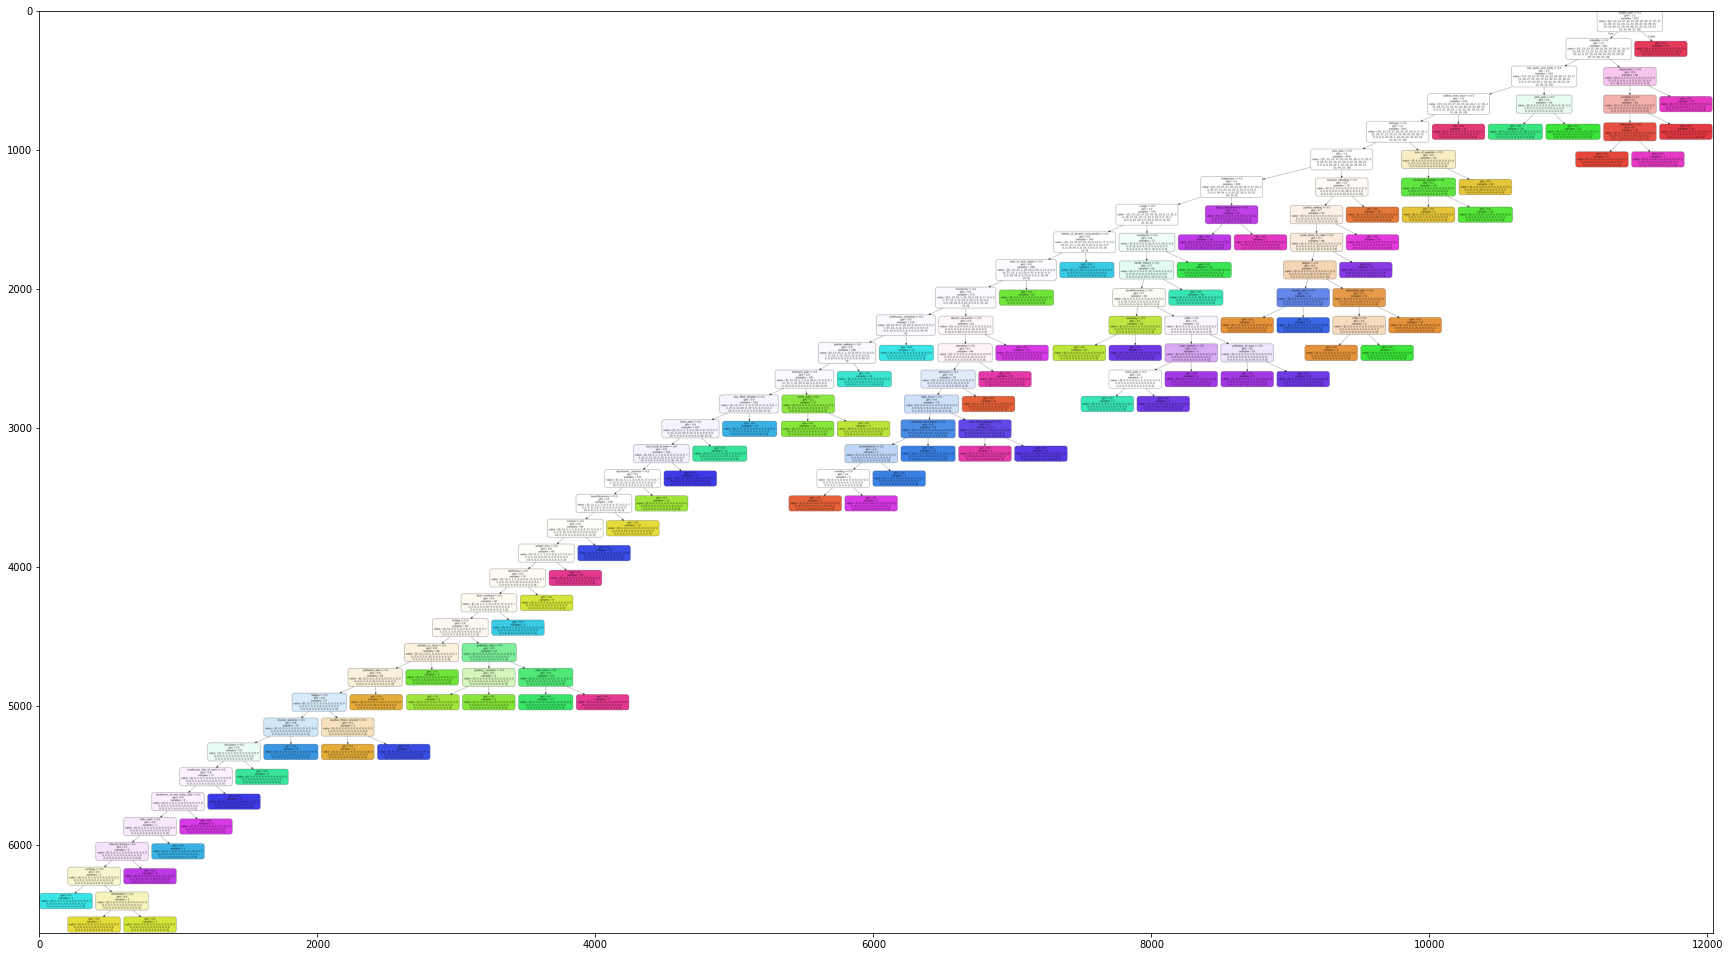

In [63]:
df["list_of_Symps"] = 0
for i in range(df.shape[0]):
    values = df.iloc[i].values
    values = values.tolist()
    if 0 in values:
        df["list_of_Symps"][i] = values[1:values.index(0)]
    else:
        df["list_of_Symps"][i] = values[1:]


print(df.tail)
print(df.head())
description=pd.read_csv("/content/dataset.csv")

objects = (df.dtypes == 'object')
object_cols = list(objects[objects].index)
print(object_cols)
column_values = df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()
print(column_values)
symptoms=pd.unique(column_values.tolist())
#we have nan values
symptoms = [i for i in symptoms if str(i) != "nan"]
print(len(symptoms))

new_data = pd.DataFrame(columns = symptoms,index = df.index)
#adding the disease
new_data['list_of_Symps']=df['list_of_Symps']

#Filling our data frame with 
for i in new_data:
    new_data[i] = df.apply(lambda x:1 if i in x.list_of_Symps else 0, axis=1)

new_data['Disease']=df['Disease']
new_data=new_data.drop('list_of_Symps',axis=1)

print(new_data.head())

#Spliting the data vset
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(new_data, test_size=0.8, random_state=25)
X_train_data=training_data.drop("Disease",axis=1)
y_train_data = training_data["Disease"].copy()
X_test = testing_data.drop("Disease",axis=1)
y_test = testing_data["Disease"].copy()

#RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train_data,y_train_data)
print(X_train_data.shape)
print(y_train_data.shape)
y_pred=rnd_forest.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(cross_val_score(rnd_forest,X_train_data,y_train_data,cv=5).mean())
'''
It shows 100% ,wow!
'''

#It gives 100% accuracy 
#Let`s see how the tree was drew
from sklearn.tree import export_graphviz
# Export as dot file
estimator = rnd_forest.estimators_[1]

from sklearn.tree import export_graphviz
export_graphviz(estimator, 
                out_file='tree.dot', 
                    feature_names = X_train_data.columns,
                rounded = True, proportion = False, 
                precision = 1, filled = True)
! dot -Tpng tree.dot -o tree.png
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (30, 30))
plt.imshow(img)

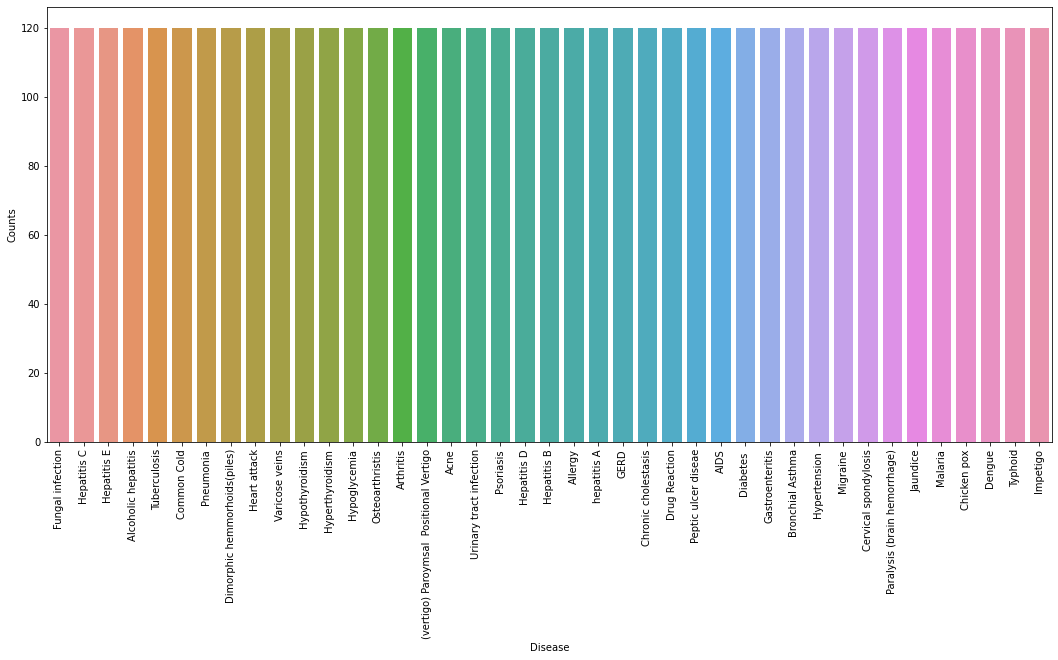

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
# Checking whether the dataset is balanced or not
disease_counts = df["Disease"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [61]:
dd.iloc[1329]

Disease       Bronchial Asthma
Symptom_1              fatigue
Symptom_2           high_fever
Symptom_3       breathlessness
Symptom_4       family_history
Symptom_5        mucoid_sputum
Symptom_6                  NaN
Symptom_7                  NaN
Symptom_8                  NaN
Symptom_9                  NaN
Symptom_10                 NaN
Symptom_11                 NaN
Symptom_12                 NaN
Symptom_13                 NaN
Symptom_14                 NaN
Symptom_15                 NaN
Symptom_16                 NaN
Symptom_17                 NaN
Name: 1329, dtype: object

In [62]:
###END###